Matrix:  [[60.844, 54.66, 60.053, 41.987], [61.02, 106.725, 164.265, 98.093]]


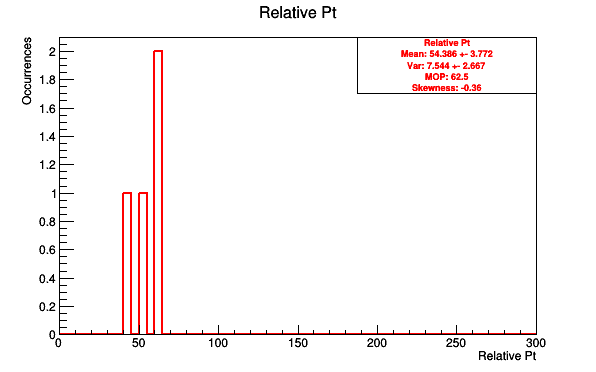

In [4]:
import ROOT
from NeuralNetwork import MultiLayerPerceptron as mlp
from functions import HistogramFunctions,AuxiliarFunctions,FigureFunctions,FitFunctions,rootnotes

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)

nrEvents = 3

output = "/home/isabella/Workspace/python/PtRelAnalysis/PtRelAnalysis/Results"

data_input = "/home/isabella/Workspace/Adrian2015/Public/WH/output/local/readPaul_1_0_J1Pt45+2BTag+TruthGENWZ+Clean_1_perevent+perjet/lvbb125.root"
treeName = "perevent"

file = ROOT.TFile(data_input,"READ")
tree = file.Get(treeName)

# for histograms
bins = 60
m_max = 300
m_min = 0

ylabel = "Occurrences"

list_inf = []
list_color = []

hist_inf = HistogramFunctions.OneDimHistInfo("Relative Pt","h_ptrel",bins,m_min,m_max,"Relative Pt",ylabel)
list_inf.append(hist_inf)
list_color.append(ROOT.kRed)

hist_inf = HistogramFunctions.OneDimHistInfo("Transverse Momentum","h_pt",bins,m_min,m_max,"Transverse Momentum",ylabel)
list_inf.append(hist_inf)
list_color.append(ROOT.kGreen)

list_hist_test = HistogramFunctions.CreateListOf1DHistograms(list_inf,list_color)
# end

# making list for create an input to a NN
list_val = []
list_ptrel = []
list_pt = []
# end

# simple histogram
#ptRel = ROOT.TH1F("ptRel", "ptRel", 60, 0, 300)

for (i,entry) in enumerate(tree):
    if nrEvents>0:
        if i>nrEvents:
            continue
    # variables for j1.     
    E1 = tree.j1_GENWZ_E
    Eta1 = tree.j1_GENWZ_Eta
    Phi1 = tree.j1_GENWZ_Phi
    Pt1 = tree.j1_GENWZ_Pt
    
    Theta1 = AuxiliarFunctions.theta(Eta1)
    Comp1 = AuxiliarFunctions.Componets(E1,Eta1,Phi1,Theta1)
    norm1 = AuxiliarFunctions.norm(Comp1)
    
    # variables for j2.     
    E2 = tree.j2_GENWZ_E
    Eta2 = tree.j2_GENWZ_Eta
    Phi2 = tree.j2_GENWZ_Phi
    Pt2 = tree.j2_GENWZ_Pt
    
    Theta2 = AuxiliarFunctions.theta(Eta2)
    Comp2 = AuxiliarFunctions.Componets(E2,Eta2,Phi2,Theta2)
    norm2 = AuxiliarFunctions.norm(Comp2)
    
    # sum of components.
    Comp3 = AuxiliarFunctions.somaComponents(Comp1,Comp2)
    norm3 = AuxiliarFunctions.norm(Comp3)
    numerador1 = AuxiliarFunctions.numerador(Comp1,Comp3)
    
    angle1 = AuxiliarFunctions.alpha(numerador1,norm1,norm3)
    
    #compute Relative Pt
    ptrel_j1 = AuxiliarFunctions.PtRelative(E1,angle1)
    
    #fill list with variables
    list_ptrel.append(round(ptrel_j1,3))
    list_pt.append(round(Pt1,3))
    
    #Fill simple histogram
    #ptRel.Fill(ptrel_j1)
    
    #fill histograms
    list_hist_test[0].Fill(ptrel_j1)
    list_hist_test[1].Fill(Pt1)
    

list_val.append(list_ptrel)
list_val.append(list_pt)

HistogramFunctions.Draw1DHists(list_hist_test,output)


print "Matrix: ", list_val
#print "Result", list_hist_test[0]

# to draw histogram
c1 = rootnotes.canvas("c1", (600, 400))
c1 = HistogramFunctions.Draw1DHistInCanvas(list_hist_test,0,c1)
test = ROOT.TPaveText(0.6, 0.75, 0.9, 0.9, "NDC")
test = FigureFunctions.GetHistInfo(list_hist_test[0],test)
test.SetBorderSize(1)
test.SetFillColor(ROOT.kNone)
test.Draw()
c1

